In [194]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

# 從https://data.giss.nasa.gov/gistemp/ 下載ＣＳＶ黨並匯入做分析


## 試著用線性迴歸來分析非線性的數據，運用地球溫度來做數據分析

In [195]:
df_golbal = pd.read_csv('/Users/jasonyeh/Desktop/Python_DL/GLB.Ts.csv',sep=',' )
df_north = pd.read_csv('/Users/jasonyeh/Desktop/Python_DL/NH.Ts.csv',)
df_south = pd.read_csv('/Users/jasonyeh/Desktop/Python_DL/SH.Ts.csv',sep=',')

In [196]:
df_north.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-1.00,-0.81,-0.79,-.92,-.38,-.38,-.22,-.33,-.50,-.53,-.88,-1.11,-.65,***,***,-.70,-.31,-.64
1,1881,-0.66,-0.78,-0.38,-.30,-.28,-.86,-.43,-.19,-.34,-.70,-.67,-.63,-.52,-.56,-.85,-.32,-.50,-.57
2,1882,0.17,0.11,-0.20,-.71,-.66,-.61,-.57,-.26,-.43,-.89,-.99,-1.18,-.52,-.47,-.12,-.53,-.48,-.77
3,1883,-1.20,-1.29,-0.65,-.64,-.68,-.32,-.25,-.47,-.52,-.49,-.88,-.75,-.68,-.71,-1.22,-.66,-.35,-.63
4,1884,-0.84,-0.73,-1.28,-1.20,-.90,-.91,-.68,-.79,-.82,-.78,-.94,-.85,-.89,-.89,-.77,-1.13,-.79,-.85


In [197]:
df_golbal=pd.DataFrame(df_golbal[1:-1],dtype=np.float)


df_north=pd.DataFrame(df_north[1:-1],dtype=np.float)


df_south=pd.DataFrame(df_south[1:-1],dtype=np.float)


## 北半球的溫度變化

###  畫出原始數據看一下，看起來是非線性，決定試著用線性迴歸去擬合非線性的曲線

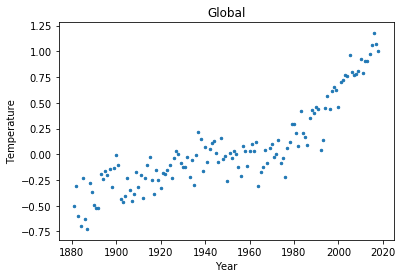

In [198]:
X_G=np.array(df_golbal["Year"]);
Y_G=np.array(df_golbal["SON"]);
plt.figure(0)
plt.title('Global');
plt.xlabel('Year');
plt.ylabel('Temperature');
plt.scatter(X_G,Y_G,s=6);


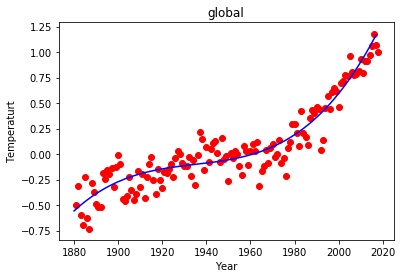

array([1.7920253])

In [199]:
pf=PolynomialFeatures(degree=3)
length = len(X_G)
XG = np.array(X_G).reshape([length,1])
YG = np.array(Y_G)
minXG = min(X_G)-1
maxXG = max(X_G)
#print(len(X))
#print(len(Y))
XG = np.arange(minXG,maxXG).reshape([-1,1])
#print(len(X))
#print(len(Y))
XG_poly = pf.fit_transform(XG)
lin_reg_G = linear_model.LinearRegression()
lin_reg_G.fit(XG_poly, YG)
plt.figure(1)
plt.title('global')
plt.scatter(X_G,Y_G, color = 'red')
plt.plot(XG, lin_reg_G.predict(pf.fit_transform(XG)), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Temperaturt')
plt.show()

lin_reg_G.predict(pf.fit_transform(np.array([[2030],])))

## 運用線性回歸法擬合三次方的曲線 紅點為數據，藍線為擬合線


##  南半球的平均溫度變化

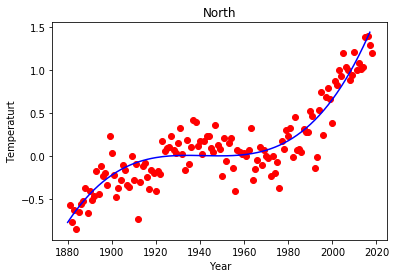

array([2.34450648])

In [226]:
X_N=np.array(df_north["Year"]);
Y_N=np.array(df_north["SON"]);

length = len(X_N)
XN = np.array(X_N).reshape([length,1])
YN = np.array(Y_N)
minXN = min(X_N)-1
maxXN = max(X_N)
#print(len(X))
#print(len(Y))
XN = np.arange(minXN,maxXN).reshape([-1,1])
#print(len(X))
#print(len(Y))
XN_poly = pf.fit_transform(XN)
lin_reg_N = linear_model.LinearRegression()
lin_reg_N.fit(XN_poly, YN)
plt.figure(2)
plt.title('North')
plt.scatter(X_N,Y_N, color = 'red')
plt.plot(XN, lin_reg_N.predict(pf.fit_transform(XN)), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Temperaturt')
plt.show()
lin_reg_N.predict(pf.fit_transform(np.array([[2030],])))

## 北辦球平均溫度變化

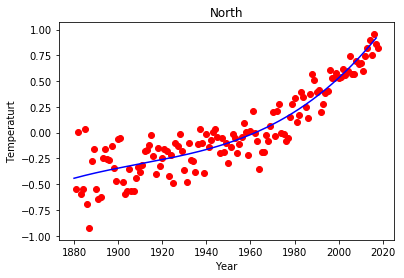

array([1.29473549])

In [227]:
X_S=np.array(df_south["Year"]);
Y_S=np.array(df_south["SON"]);

XT=np.array([2030])
length = len(XT)
XTT = np.array(XT).reshape([length,1])







length = len(X_S)
XS = np.array(X_S).reshape([length,1])
YS = np.array(Y_S)
minXS = min(X_S)-1
maxXS = max(X_S)
#print(len(X))
#print(len(Y))
XS = np.arange(minXS,maxXS).reshape([-1,1])
#print(len(X))
#print(len(Y))
XS_poly = pf.fit_transform(XS)
lin_reg_S = linear_model.LinearRegression()
lin_reg_S.fit(XS_poly, YS)
plt.figure(3)
plt.title('North')
plt.scatter(X_S,Y_S, color = 'red')
plt.plot(XS, lin_reg_S.predict(pf.fit_transform(XS)), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Temperaturt')
plt.show()
lin_reg_S.predict(pf.fit_transform(np.array([[2030],])))

In [228]:
G=lin_reg_G.predict(pf.fit_transform(np.array([[2030],])))


In [229]:
S=lin_reg_S.predict(pf.fit_transform(np.array([[2030],])))


In [230]:
N=lin_reg_N.predict(pf.fit_transform(np.array([[2030],])))

In [231]:
 print(f'2030全球頻均溫度差{float(G)}度',f'南半球頻均溫度差{float(N)}度',f'北半球頻均溫度差{float(S)}度',)

2030全球頻均溫度差1.7920252985786647度 南半球頻均溫度差2.344506481440476度 北半球頻均溫度差1.2947354867637841度


### 透過回歸線預測，地球愈來愈熱，從回歸線的預測中可以看出，南半球的溫度高於北半球，這是因為南半球的陸地比較少，海水熱容大所以溫度較高，個別的分析中可以看出南半球的趨勢跟北半球不同，這跟工業化的程度有關係，南半球工業化比較晚所以比較晚上升